# EDA on Uber Data

## Objective : 
### To estimate the revenue of uber in a year in New York and it's growth.
            


## Importing libraries


In [1]:
# importing libraries

import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [2]:
import numpy as np
print('Numpy version :', np.__version__)

import pandas as pd
print('Pandas version :', pd.__version__)

import matplotlib as mpl
print('Matplot version :', mpl.__version__)

import seaborn as sns
print('Seaborn version :', sns.__version__)

import datetime as dt
#print('Datetime version :', dt.__version__)

import time as time
#print('Time version :', time.__version__)

Numpy version : 1.23.5
Pandas version : 1.5.3
Matplot version : 3.7.0
Seaborn version : 0.12.2


In [3]:
sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

#Avoid display of scientific notation and show precision of 4 decimals:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Reading and Loading Uber data

In [4]:
ds_uber = pd.read_csv('Uber_nyc_data.csv')

## Data Engineering

#### Searching for missing data and null values

In [5]:
ds_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17


In [6]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


Total entries : 30925738

In [7]:
len(ds_uber.id.unique())

30925738

In [8]:
len(ds_uber[ds_uber.duplicated()])

0

In [9]:
ds_uber.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
30925733    False
30925734    False
30925735    False
30925736    False
30925737    False
Length: 30925738, dtype: bool

In [10]:
ds_uber.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
pickup_datetime          0
trip_distance           38
trip_duration           38
dtype: int64

significant number of null values in destination colomn. ver few in trip colomn

In [11]:
print(ds_uber.origin_taz.unique())
print('Total unique origin : ', len(ds_uber.origin_taz.unique()))

['7C' '7B' '11' '3B' '2A' '5B' '10' '2B' '9' '6B' '15' '4C' '5A' '8' '14'
 '4A' '7A' '1' '16' '3A' '2C' '6A' '12' '13' '3C' '4B' '5C' '17']
Total unique origin :  28


In [12]:
print(ds_uber.destination_taz.unique())
print('Total unique destination : ', len(ds_uber.destination_taz.unique()))

['6A' '15' '2A' '4A' '10' '4C' '7A' '3C' '5B' '14' '8' nan '7C' '12' '2C'
 '1' '6B' '5C' '9' '3A' '2B' '11' '7B' '5A' '13' '4B' '18' '16' '3B' '17']
Total unique destination :  30


In [13]:
set(ds_uber.destination_taz.unique()) - set(ds_uber.origin_taz.unique())

{'18', nan}

In [14]:
set(ds_uber.origin_taz.unique()) - set(ds_uber.destination_taz.unique()) 

set()

destination have one location which is not in origin location meanwhile, all origin is sometime destination

In [15]:
ds_uber[ds_uber.destination_taz.isnull()]

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,2014-09-01 17:00:00,11.6700,0:23:45
32,252613,9,NaN,2014-09-01 16:00:00,80.6900,1:59:37
63,252644,9,NaN,2014-09-01 18:00:00,23.0700,1:03:37
141,252722,9,NaN,2014-09-01 10:00:00,21.7300,0:41:12
148,252729,4B,NaN,2014-09-01 10:00:00,4.6200,0:14:55
...,...,...,...,...,...,...
30925713,30693200,2A,NaN,2015-09-01 00:00:00,3.4600,0:13:25
30925716,30693212,4B,NaN,2015-09-01 00:00:00,14.8500,0:20:24
30925729,30693336,14,NaN,2015-09-01 00:00:00,14.1500,0:29:27
30925731,30693410,5B,NaN,2015-09-01 00:00:00,33.8900,1:01:09


In [16]:
ds_uber[ds_uber.trip_distance.isnull() & ds_uber.trip_duration.isnull()].head(10)
#total 38 rows have both null distance and duration values

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN
17478943,25656087,7A,4C,2015-04-29 08:00:00,NaN,NaN
17980063,544754,10,15,2015-05-09 02:00:00,NaN,NaN
18385948,4428619,6B,2A,2015-05-20 19:00:00,NaN,NaN
18420794,4897670,9,7A,2015-05-12 06:00:00,NaN,NaN
18432788,4909664,2C,5C,2015-05-20 09:00:00,NaN,NaN


##### Here, we are checking for missing data in reference combination of distance and duration being null while looking if destination is same as origin.


In [17]:
print('Distance and Duration is Null Value \n')
print(
   '\t Different Pickup and Drop : ', len(ds_uber[ds_uber.trip_distance.isnull() & ds_uber.trip_duration.isnull() & (ds_uber.origin_taz != ds_uber.destination_taz)]),
    '\n\t Same Pickup and Drop : ', len(ds_uber[ds_uber.trip_distance.isnull() & ds_uber.trip_duration.isnull() & (ds_uber.origin_taz == ds_uber.destination_taz)]),
    '\n\t Duration, but null distance : ', len(ds_uber[(ds_uber.trip_duration.isnull() == False ) & (ds_uber.trip_distance.isnull())])
)

Distance and Duration is Null Value 

	 Different Pickup and Drop :  26 
	 Same Pickup and Drop :  12 
	 Duration, but null distance :  0


In total 38 rows with null duration and time 
* we have 26 rows with different destination and origin 
* we have 12 rows with same destination and origin
    
12 rows might be case of customer cancelling uber ride

In [18]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [19]:
ds_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17


#### Converting pickup_datetime colomn from object to datetime format


In [20]:
len(ds_uber[ds_uber.pickup_datetime.apply(lambda x: x[-5:] != '00:00')])
#                dataset            apply function        

0

this column dont have any minute and second data

In [21]:
#converting pickup_datetime to data datetime
t0 = time.time()
ds_uber['pickup_date_hour'] = ds_uber.pickup_datetime.apply(
                                                lambda x : dt.datetime(
                                                    int(x[0:4]), int(x[5:7]), int(x[8:10]), int(x[-8:-6])))
time.time() - t0

47.39145040512085

In [22]:
ds_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,pickup_date_hour
0,252581,7C,6A,2014-09-01 09:00:00,4.2500,0:15:11,2014-09-01 09:00:00
1,252582,7B,15,2014-09-01 18:00:00,10.1700,0:34:05,2014-09-01 18:00:00
2,252583,11,2A,2014-09-01 17:00:00,4.0200,0:17:06,2014-09-01 17:00:00
3,252584,3B,4A,2014-09-01 13:00:00,1.4600,0:06:32,2014-09-01 13:00:00
4,252585,2A,10,2014-09-01 14:00:00,8.3100,0:26:17,2014-09-01 14:00:00


In [23]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origin_taz        object        
 2   destination_taz   object        
 3   pickup_datetime   object        
 4   trip_distance     float64       
 5   trip_duration     object        
 6   pickup_date_hour  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.6+ GB


In [24]:
ds_uber = ds_uber.drop('pickup_datetime',axis=1)

In [25]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origin_taz        object        
 2   destination_taz   object        
 3   trip_distance     float64       
 4   trip_duration     object        
 5   pickup_date_hour  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.4+ GB


In [26]:
#### Start and End time and date of data collection

start, end  = ds_uber.pickup_date_hour.min(), ds_uber.pickup_date_hour.max()

print('Beginining Date : ', start,
     '\nEnd Date : ', end,
     '\nTime Period : ', end - start)

Beginining Date :  2014-09-01 00:00:00 
End Date :  2015-09-01 00:00:00 
Time Period :  365 days 00:00:00


This data is gennerated in [ September 1, 2014  -  September 1, 2015 ]

#### Getting holidays and special days

In [27]:
#get all fedaral holidays in US during collection time period

from pandas.tseries.holiday import USFederalHolidayCalendar as USFHC

holidays = USFHC().holidays(start,end, return_name = True)

holidays

2014-09-01                              Labor Day
2014-10-13                           Columbus Day
2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington’s Birthday
2015-05-25                           Memorial Day
2015-07-03                       Independence Day
dtype: object

Since people call for rides not only on holidays but day before and after it

In [28]:
holidays_all = pd.concat([holidays, 'Day After ' + holidays.shift(1, 'D'), 'Day before ' + holidays.shift(-1, 'D')])
#new list                 1st series,   second series,                        third series 
holidays_all = holidays_all.sort_index()
holidays_all

2014-08-31                              Day before Labor Day
2014-09-01                                         Labor Day
2014-09-02                               Day After Labor Day
2014-10-12                           Day before Columbus Day
2014-10-13                                      Columbus Day
2014-10-14                            Day After Columbus Day
2014-11-10                           Day before Veterans Day
2014-11-11                                      Veterans Day
2014-11-12                            Day After Veterans Day
2014-11-26                       Day before Thanksgiving Day
2014-11-27                                  Thanksgiving Day
2014-11-28                        Day After Thanksgiving Day
2014-12-24                          Day before Christmas Day
2014-12-25                                     Christmas Day
2014-12-26                           Day After Christmas Day
2014-12-31                         Day before New Year's Day
2015-01-01              

In [29]:
('Day After ' + holidays.shift(1, 'D')).info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2014-09-02 to 2015-07-04
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


In [30]:
holidays.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2014-09-01 to 2015-07-03
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


## Feature Engineering

In [31]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origin_taz        object        
 2   destination_taz   object        
 3   trip_distance     float64       
 4   trip_duration     object        
 5   pickup_date_hour  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.4+ GB


### Extracting date,year, month, day, hour, day of week into seperate column

In [32]:
t0 = time.time()

#ds_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'),ds_uber['pickup_date_hour'].values))
ds_uber['pu_date'] = pd.to_datetime(ds_uber['pickup_date_hour'].dt.date)
time.time() - t0

12.376148223876953

In [33]:
t0 = time.time()
ds_uber['pu_year'] = ds_uber['pickup_date_hour'].dt.year
ds_uber['pu_month'] = ds_uber['pickup_date_hour'].dt.month
ds_uber['pu_day'] = ds_uber['pickup_date_hour'].dt.day
time.time() - t0

6.31760573387146

In [34]:
t0 = time.time()
ds_uber['pu_hour'] = ds_uber['pickup_date_hour'].dt.hour 
# minute and second are already zero
ds_uber['pu_weekday'] = ds_uber['pickup_date_hour'].dt.dayofweek
time.time() - t0

4.302713632583618

In [35]:
ds_uber.pu_weekday.value_counts() # monday - sunday :: 0 : 6

5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: pu_weekday, dtype: int64

In [36]:
ds_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pickup_date_hour,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday
0,252581,7C,6A,4.2500,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0
1,252582,7B,15,10.1700,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0
2,252583,11,2A,4.0200,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0
3,252584,3B,4A,1.4600,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0
4,252585,2A,10,8.3100,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0


In [37]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origin_taz        object        
 2   destination_taz   object        
 3   trip_distance     float64       
 4   trip_duration     object        
 5   pickup_date_hour  datetime64[ns]
 6   pu_date           datetime64[ns]
 7   pu_year           int64         
 8   pu_month          int64         
 9   pu_day            int64         
 10  pu_hour           int64         
 11  pu_weekday        int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 2.8+ GB


### Trip duration transformation

In [38]:
unique_duration = ds_uber[ds_uber.trip_duration.isnull() == False].trip_duration.unique()

In [39]:
print(len(unique_duration))

unique_duration

19393


array(['0:15:11', '0:34:05', '0:17:06', ..., '6:21:14', '7:53:17',
       '3:54:35'], dtype=object)

There are around 20k unique durations.

In [40]:
# unique duration greater than and less than 10 hour

great10 = []
less10 = []

for dur in unique_duration:
    if len(dur) != 7 :      # less than 10 hr (x:xx:xx) || more than than 10 hr (1x:xx:xx)
        great10.append(dur)
    
    elif len(dur) == 7:
        less10.append(dur)

In [41]:
print(len(great10))
great10[1:10]

386


['11:08:02',
 '13:51:53',
 '43:49:51',
 '26:36:59',
 '20:22:05',
 '13:43:19',
 '16:30:30',
 '16:10:21',
 '17:28:09']

In [42]:
print(len(less10))
less10[1:10]

19007


['0:34:05',
 '0:17:06',
 '0:06:32',
 '0:26:17',
 '0:08:35',
 '0:19:36',
 '0:18:17',
 '0:07:29',
 '0:28:37']

#### Checking if Values are longer than 100 hr

In [43]:
long100 = []

for dur in unique_duration:
    if len(dur) >= 9 :  # 100:xx:xx (9 length or more)
        long100.append(dur)

In [44]:
print(len(long100))
long100[1:10]

7


['172032:39:03',
 '136:25:12',
 '172032:17:45',
 '172032:19:27',
 '119:53:35',
 '120:49:05']

##### There are 7 unusual duration. longest is 172032 hr and shortest is 136 hr

#### Converting duration to minutes

In [45]:
ds_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pickup_date_hour,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday
0,252581,7C,6A,4.2500,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0
1,252582,7B,15,10.1700,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0
2,252583,11,2A,4.0200,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0
3,252584,3B,4A,1.4600,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0
4,252585,2A,10,8.3100,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0


In [46]:
def dur_to_min(s):
    '''
    This is custom Function. Takes a string with hh:mm:ss format and returns the integer equivalent to
    minutes or zero for missing values 
    '''
    
    if pd.isnull(s):
        val = 0
    else:
        split_dur = s.split(':')
        tot_second = int(int(split_dur[-1]) + (int(split_dur[-2])*60) + (int(split_dur[-3])*3600))
        val = tot_second/60
    
    return val

In [47]:
#applying the above function to duration column

t0 = time.time()

ds_uber['duration_minutes'] = ds_uber.trip_duration.apply(dur_to_min)

time.time() - t0

50.71590042114258

In [48]:
ds_uber.head(10)

,id,origin_taz,destination_taz,trip_distance,trip_duration,pickup_date_hour,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes
0,252581,7C,6A,4.2500,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0,15.1833
1,252582,7B,15,10.1700,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0,34.0833
2,252583,11,2A,4.0200,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0,17.1000
3,252584,3B,4A,1.4600,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0,6.5333
4,252585,2A,10,8.3100,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,26.2833
5,252586,5B,4C,1.0400,0:08:35,2014-09-01 12:00:00,2014-09-01,2014,9,1,12,0,8.5833
6,252587,10,10,1.4400,0:19:36,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,19.6000
7,252588,2A,7A,5.0800,0:18:17,2014-09-01 03:00:00,2014-09-01,2014,9,1,3,0,18.2833
8,252589,2B,3C,1.6400,0:07:29,2014-09-01 11:00:00,2014-09-01,2014,9,1,11,0,7.4833
9,252590,9,5B,16.6300,0:28:37,2014-09-01 20:00:00,2014-09-01,2014,9,1,20,0,28.6167


In [49]:
ds_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origin_taz        object        
 2   destination_taz   object        
 3   trip_distance     float64       
 4   trip_duration     object        
 5   pickup_date_hour  datetime64[ns]
 6   pu_date           datetime64[ns]
 7   pu_year           int64         
 8   pu_month          int64         
 9   pu_day            int64         
 10  pu_hour           int64         
 11  pu_weekday        int64         
 12  duration_minutes  float64       
dtypes: datetime64[ns](2), float64(2), int64(6), object(3)
memory usage: 3.0+ GB


#### Handling of missing Values

In [50]:
#get the mean distance and duration for each origin-destination pair

ds_DistDur = ds_uber.groupby(['origin_taz', 'destination_taz'])[['trip_distance','duration_minutes']].mean()

In [51]:
ds_DistDur.head(10)

trip_distance  duration_minutes
origin_taz destination_taz                                 
1          1                       1.4219           10.5655
           10                      3.6508           17.9776
           11                      5.0937           22.4899
           12                      8.8878           29.1024
           13                     11.5831           32.1568
           14                     14.0645           38.9106
           15                      7.1042           27.3468
           16                     15.4904           40.1718
           17                     16.8236           36.7168
           18                     14.9147           36.8338

#### Replacing missing values with average distance and duration with respective origin - destination pair

In [52]:
miss38 = ds_uber[ds_uber.trip_distance.isnull() & ds_uber.trip_duration.isnull()]
miss38.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pickup_date_hour,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes
15155317,39535,2A,11,NaN,NaN,2015-04-25 12:00:00,2015-04-25,2015,4,25,12,5,0.0000
15245057,1009076,2A,2A,NaN,NaN,2015-04-26 01:00:00,2015-04-26,2015,4,26,1,6,0.0000
16519652,15028665,2A,7C,NaN,NaN,2015-04-29 21:00:00,2015-04-29,2015,4,29,21,2,0.0000
17148253,22250173,2A,2A,NaN,NaN,2015-04-12 02:00:00,2015-04-12,2015,4,12,2,6,0.0000
17297563,23716998,2C,11,NaN,NaN,2015-04-25 13:00:00,2015-04-25,2015,4,25,13,5,0.0000


In [53]:
for i in miss38.index :
    ori = ds_uber.loc[i,'origin_taz']
    dest = ds_uber.loc[i,'destination_taz']
    
    ds_uber.loc[i,'trip_distance'] = ds_DistDur.loc[ori, dest].trip_distance
    ds_uber.loc[i, 'duration_minutes'] = ds_DistDur.loc[ori,dest].duration_minutes


In [54]:
ds_uber.isnull().sum()

id                        0
origin_taz                0
destination_taz     1273023
trip_distance             0
trip_duration            38
pickup_date_hour          0
pu_date                   0
pu_year                   0
pu_month                  0
pu_day                    0
pu_hour                   0
pu_weekday                0
duration_minutes          0
dtype: int64

<b> There are still missing values in trip_duration, but those values have been replaced in duration_minutes since both are minute-time mirror column each </b>

#### Dropping few redundant column

In [55]:
ds_uber = ds_uber.drop('trip_duration', axis =1)

In [56]:
ds_uber = ds_uber.drop('pickup_date_hour', axis =1)

In [57]:
ds_uber.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833


#### Calculation of avg speed 

In [58]:
ds_uber['mph_avg'] = ds_uber.trip_distance/(ds_uber.duration_minutes/60.0)

In [59]:
ds_uber.iloc[miss38.index, :].head()

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg
15155317,39535,2A,11,3.9368,2015-04-25,2015,4,25,12,5,19.7321,11.9708
15245057,1009076,2A,2A,1.3588,2015-04-26,2015,4,26,1,6,10.9195,7.4660
16519652,15028665,2A,7C,9.0394,2015-04-29,2015,4,29,21,2,30.2041,17.9566
17148253,22250173,2A,2A,1.3588,2015-04-12,2015,4,12,2,6,10.9195,7.4660
17297563,23716998,2C,11,4.8331,2015-04-25,2015,4,25,13,5,24.3851,11.8918


### <b> Estimation of revenue per trip </b>


In [60]:
ds_uber.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000,14.1053
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333,13.4082
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833,18.9702


<b> Fare rates are calculed from [weblink](https://www.investopedia.com/articles/personal-finance/021015/uber-versus-yellow-cabs-new-york-city.asp) </b>

<b> UberX </b>
* Base fare : $2.55

* Minute  : $0.35

* Mile    : $1.75

* Minimum Fare : $7.00

In [61]:
#defining rates 

base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [62]:
#def function to cal revenue

def est_revenue(arr):
    rev = base_fare + per_minute*arr[0] + per_mile*arr[1]
    
    return rev if rev > min_fare else min_fare

<b>Using eval method, since it is more effiecient for large datasets than resorting to numpy </b>

In [63]:
ds_uber['revenue'] = ds_uber.eval('@base_fare + duration_minutes*@per_minute + trip_distance*@per_mile')
    # local variables must be followed by @


In [64]:
ds_uber.head(2)

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947,15.3017
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032,32.2767


<b>We still need to set min fare to 8 dollar, if calculated fare is less than 8 dollar</b>

In [65]:
ds_uber.loc[ds_uber.revenue < 8, 'revenue'] = min_fare
#            row locating          colomn     changing value

In [66]:
ds_uber.head()

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947,15.3017
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032,32.2767
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000,14.1053,15.5700
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333,13.4082,8.0000
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833,18.9702,26.2917


### Outlier Detections
Outlier is an observation that appears for away and diverse from overall pattern. Outlier tends to **make** our **data skewed and reduces accuracy.**


In [67]:
# >= 100h
print(len(ds_uber[(ds_uber.duration_minutes >= 6000)]))

# calculating sum of revenue if duration is between 16 h to 100 h

rev16_100 = ds_uber[(ds_uber.duration_minutes < 6000) & (ds_uber.duration_minutes > 960)].revenue.sum()
rev100 =  ds_uber[(ds_uber.duration_minutes >= 6000)].revenue.sum()

print('Estimated total revenue for duration > 100 h : ', rev100)
print('Estimated total revenue for duration between 16 and 100 h : ', rev16_100)

7
Estimated total revenue for duration > 100 h :  14459977.979999999
Estimated total revenue for duration between 16 and 100 h :  78069.74916666666


Logically, travelling for 100 hr does not seems feasible. And it has **significant contributions** to Total revenue for Uber

* Estimated total revenue for duration > 100 h :  **14, 459, 976.95**
* Estimated total revenue for duration between 16 and 100 h :  **78, 049.10**

In [68]:
print(len(ds_uber[(ds_uber.duration_minutes == 0) & (ds_uber.trip_distance == 0)]))

24866


In [69]:
len(ds_uber[(ds_uber.duration_minutes == 0) & (ds_uber.trip_distance == 0) & (ds_uber.origin_taz != ds_uber.destination_taz)])

910

These number of trips have taken place with different origin and destination location but zero in duration_minutes and trip_distance. 

**Checking case in which distance is zero, with non-zero duration AND vice versa**

In [70]:
len(ds_uber[(ds_uber.duration_minutes == 0) & (ds_uber.trip_distance != 0)]) +\
len(ds_uber[(ds_uber.duration_minutes != 0) & (ds_uber.trip_distance == 0)])

85515

**Checking case in which speed is lower than 3**

In [71]:
len(ds_uber[ds_uber.mph_avg <= 3])

262666

In [72]:
ds_uber[(ds_uber.mph_avg <=3) & (ds_uber.trip_distance <= 2)]

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
82,252663,14,14,0.0200,2014-09-01,2014,9,1,11,0,1.3333,0.9000,8.0000
120,252701,2A,2A,1.5100,2014-09-01,2014,9,1,20,0,33.8833,2.6739,17.0517
271,252852,8,8,0.0000,2014-09-01,2014,9,1,16,0,0.5000,0.0000,8.0000
542,253123,4C,4C,0.0500,2014-09-02,2014,9,2,17,1,1.1000,2.7273,8.0000
554,253135,2A,2A,0.0000,2014-09-02,2014,9,2,9,1,2.6833,0.0000,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30925081,20066088,17,17,0.0000,2015-09-01,2015,9,1,0,1,1.7500,0.0000,8.0000
30925401,24895670,2A,2A,0.0000,2015-09-01,2015,9,1,0,1,0.3333,0.0000,8.0000
30925481,26827598,14,14,0.0300,2015-09-01,2015,9,1,0,1,10.0000,0.1800,8.0000
30925564,28277623,17,17,0.0000,2015-09-01,2015,9,1,0,1,2.8667,0.0000,8.0000


Around 1% of cases from entire dataset have calculated speed less than 3 mph.

**Possible Reason** : Really bad traffic, trips cancelled mid-way

In [73]:
ds_uber[(ds_uber.mph_avg <=3) & (ds_uber.duration_minutes > 90)]

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
539,253120,5B,10,8.3400,2014-09-02,2014,9,2,11,1,173.3667,2.8864,77.8233
7798,260379,6A,6A,6.0100,2014-09-11,2014,9,11,12,3,128.1500,2.8139,57.9200
14734,267315,6B,5C,9.0800,2014-09-19,2014,9,19,13,4,196.2500,2.7761,87.1275
14996,267577,4C,6A,5.4800,2014-09-20,2014,9,20,15,5,110.7000,2.9702,50.8850
17131,269712,2A,NaN,4.8800,2014-09-21,2014,9,21,20,6,100.4667,2.9144,46.2533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906583,30676135,14,14,0.3400,2015-08-21,2015,8,21,19,4,167.5333,0.1218,61.7817
30906587,30676139,15,2C,4.1900,2015-08-21,2015,8,21,18,4,381.2333,0.6594,143.3142
30906614,30676166,6B,5B,3.2600,2015-08-21,2015,8,21,19,4,473.2833,0.4133,173.9042
30910862,30680414,2B,4A,6.9600,2015-08-24,2015,8,24,12,0,175.9667,2.3732,76.3183


* Among the trips with very slow speed (< 3 mph), the most suspicious cases are perhaps those that show very long duration. 
* Let's say that 1.5h would have been enough, in most situations, to get outside of some traffic gridlock.
* Part of these cases should be investigated more in depth, especially because **they represent a significant share of the revenue ($850K)**.

In [74]:
ds_uber[(ds_uber.mph_avg <= 3) & (ds_uber.duration_minutes > 90) & (ds_uber.duration_minutes <= 960)]

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
539,253120,5B,10,8.3400,2014-09-02,2014,9,2,11,1,173.3667,2.8864,77.8233
7798,260379,6A,6A,6.0100,2014-09-11,2014,9,11,12,3,128.1500,2.8139,57.9200
14734,267315,6B,5C,9.0800,2014-09-19,2014,9,19,13,4,196.2500,2.7761,87.1275
14996,267577,4C,6A,5.4800,2014-09-20,2014,9,20,15,5,110.7000,2.9702,50.8850
17131,269712,2A,NaN,4.8800,2014-09-21,2014,9,21,20,6,100.4667,2.9144,46.2533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906583,30676135,14,14,0.3400,2015-08-21,2015,8,21,19,4,167.5333,0.1218,61.7817
30906587,30676139,15,2C,4.1900,2015-08-21,2015,8,21,18,4,381.2333,0.6594,143.3142
30906614,30676166,6B,5B,3.2600,2015-08-21,2015,8,21,19,4,473.2833,0.4133,173.9042
30910862,30680414,2B,4A,6.9600,2015-08-24,2015,8,24,12,0,175.9667,2.3732,76.3183


### Data Visualization

In [76]:
ds_viz = ds_uber[(ds_uber.pu_date != dt.date(2015,9,1)) & (ds_uber.duration_minutes <=900)].copy()

In [78]:
ds_viz

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
0,252581,7C,6A,4.2500,2014-09-01,2014,9,1,9,0,15.1833,16.7947,15.3017
1,252582,7B,15,10.1700,2014-09-01,2014,9,1,18,0,34.0833,17.9032,32.2767
2,252583,11,2A,4.0200,2014-09-01,2014,9,1,17,0,17.1000,14.1053,15.5700
3,252584,3B,4A,1.4600,2014-09-01,2014,9,1,13,0,6.5333,13.4082,8.0000
4,252585,2A,10,8.3100,2014-09-01,2014,9,1,14,0,26.2833,18.9702,26.2917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30925733,30693431,15,15,6.8600,2015-09-01,2015,9,1,0,1,27.6167,14.9040,24.2208
30925734,30693447,5B,2A,3.4400,2015-09-01,2015,9,1,0,1,11.1167,18.5667,12.4608
30925735,30693461,4C,NaN,6.1700,2015-09-01,2015,9,1,0,1,19.1667,19.3148,20.0558
30925736,30693466,2A,5A,1.8700,2015-09-01,2015,9,1,0,1,7.9000,14.2025,8.5875


In [79]:
ds_viz[['duration_minutes','trip_distance','mph_avg', 'revenue']].describe()

,duration_minutes,trip_distance,mph_avg,revenue
count,30925594.0000,30925594.0000,30900728.0000,30925594.0000
mean,20.9915,5.1997,13.5074,19.2416
std,16.0668,6.1307,11.7568,15.0781
min,0.0000,0.0000,0.0000,8.0000
25%,10.8500,1.6900,8.4100,9.5733
50%,17.2333,3.0900,11.4489,14.3508
75%,26.6833,6.2300,16.2669,23.0308
max,899.0667,568.5700,22548.0000,1225.8583


In [80]:
# Importing Plotting tools

import matplotlib.mlab as mlab

In [81]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
#from matplotlib._png import read_png #Load png file
from matplotlib.patches import Ellipse #Draw ellipse

In [83]:
#Create functions to format tick numbers
def thousands_comma(x, pos):
    """
    Args are the value and tick position. 
    Returns number with thousands comma and no decimals.
    """
    return '{:,.0f}'.format(x) #this is the new syntax for formatting

def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)

def millions_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with one decimal, and M in lieu of 6 zeros.
    """
    return '{:.1f}{}'.format(x * 1e-6, 'M')

def millions_currency(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with a $ sign, M in lieu of 6 zeros, and no decimals.
    """
    return '{}{:.0f}{}'.format('$', x * 1e-6, 'M')

#Define robust function to automatically add annotated labels on bar plots.
#Inspiration from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
        return None

### Visualization : Number of Uber trips per day

In [86]:
#creating a plot dataFrame with number of trips count grouped by day

byDate = ds_viz.groupby('pu_date')['id'].count()
byDate

pu_date
2014-09-01     31592
2014-09-02     41496
2014-09-03     46339
2014-09-04     53402
2014-09-05     59718
               ...  
2015-08-28    114108
2015-08-29    123387
2015-08-30    116620
2015-08-31     95582
2015-09-01      1852
Name: id, Length: 366, dtype: int64

In [87]:
len(byDate)

366

In [88]:
byDate['2014-10-28':'2014-11-05']

pu_date
2014-10-28     52084
2014-10-29     61082
2014-10-30     66368
2014-10-31     71787
2014-11-01    104450
2014-11-02     57289
2014-11-03     50491
2014-11-04     52395
2014-11-05     61518
Name: id, dtype: int64

In [89]:
byDate['2015-06-01': '2015-08-31'].mean()

107630.71739130435

In [90]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.ticker import FuncFormatter
from matplotlib.image import imread

##### Plotting

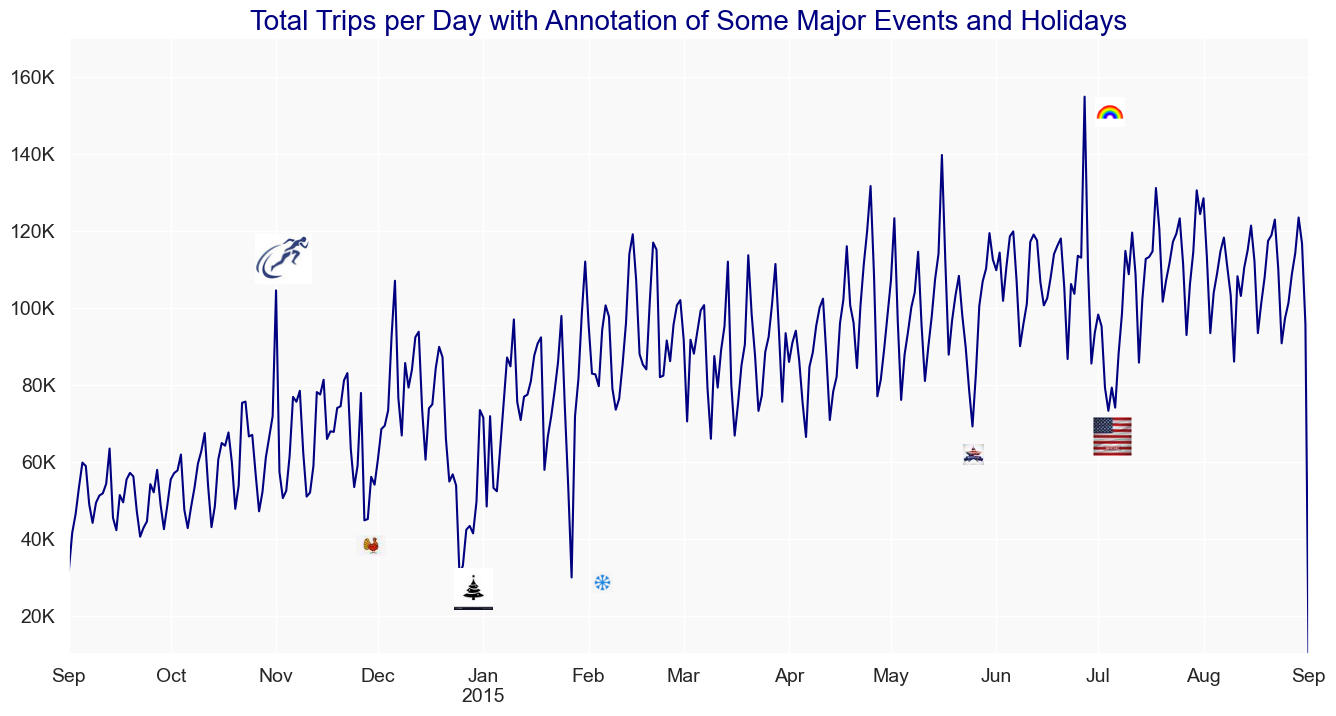

In [91]:
fig = plt.figure()

ax = byDate.plot(figsize = (16,8), fontsize = 12, ylim = (10000,170000), color = 'navy')

formatter = FuncFormatter(thousands_format)
ax.yaxis.set_major_formatter(formatter)
ax.set_facecolor('#F9F9F9')

plt.title('Total Trips per Day with Annotation of Some Major Events and Holidays', fontsize= 20, color='navy')
plt.tick_params(labelsize=14)
plt.xlabel('')

#Add icon to indicate snowstorm on the plot:
#NYC's mayor ordered the city under curfew, and public transportation system was shut down late on 1/26/15.
img1 = imread('Snow.png')
imagebox = OffsetImage(img1, zoom=0.6)
xy = [pd.to_datetime('2015-01-27').date(), 25000] # (len(byDate[:'2015-01-27'])-1, byDate['2015-01-27'])

ab = AnnotationBbox(imagebox, xy, 
                    xybox=(22., 10.), #position from xy to lower left corner of box
                    xycoords='data', #will use data coordinates for x and y
                    boxcoords='offset points', #same idea as textcoords, in points from lower left corner
                    pad=0.1, frameon=False) #padding around the image
ax.add_artist(ab)

#Add icon to indicate Thanksgiving on the plot:
img2 = imread('thanksgiving.jpg')
imagebox = OffsetImage(img2, zoom=0.6) 
xy = [pd.to_datetime('2014-11-27').date(), 40000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Christmas on the plot:
img2 = imread('ctree.jpg')
imagebox = OffsetImage(img2, zoom=0.6) 
xy = [pd.to_datetime('2014-12-25').date(), 25000] 
ab = AnnotationBbox(imagebox, xy, xybox=(10., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Memorial Day Holiday on the plot:
img3 = imread('mday.jpg')
imagebox = OffsetImage(img3, zoom=0.6) 
xy = [pd.to_datetime('2015-05-25').date(), 60000] 
ab = AnnotationBbox(imagebox, xy, xybox=(1., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Pride Week on the plot:
#According to The Wall Street Journal, the Pride Parade was attended by 1.6 million people in 2015.
img4 = imread('rainbow.png')
imagebox = OffsetImage(img4, zoom=0.6) 
xy = [pd.to_datetime('2015-06-27').date(), 150000] 
ab = AnnotationBbox(imagebox, xy, xybox=(18., 2.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Independence Day Holiday on the plot:
img5 = imread('iday.jpg')
imagebox = OffsetImage(img5, zoom=0.6) 
xy = [pd.to_datetime('2015-07-03').date(), 70000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate NYC Marathon event on the plot:
img5 = imread('marathon.jpg')
imagebox = OffsetImage(img5, zoom=0.7) 
xy = [pd.to_datetime('2014-11-01').date(), 110000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

plt.show()

##### **Effect of major events on the number of trips**

* Dip in trip counts during Thanksgiving, Christmas, Memorial Day and Independence Day
* A lingering (two consecutive days) drop in activity is seen for all these holidays but Memorial Day. It turns out that the July 4th holiday was observed on Friday in 2015.
* An apparently odd and very significant drop in the number of trips is shown on January 27th. This was a result of a curfew imposed by the NYC’s mayor in preparation for a blizzard.
* The plot also highlights which events have positively impacted the number of trips that year, with the International Marathon and the Gay Pride Week standing out as the strongest contributors. # The effect of time on demand for Uber rides: distribution per hour, weekday, and month.

### Effect of Pickup Time on demand for Uber Rides

* Distribution per hour
* Distibution per weekdays
* Distribution per month

In [93]:
weekday_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [94]:
month_name = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

In [97]:
print(ds_viz.pu_hour)
type(ds_viz.pu_hour)

0            9
1           18
2           17
3           13
4           14
            ..
30925733     0
30925734     0
30925735     0
30925736     0
30925737     0
Name: pu_hour, Length: 30925594, dtype: int64


pandas.core.series.Series

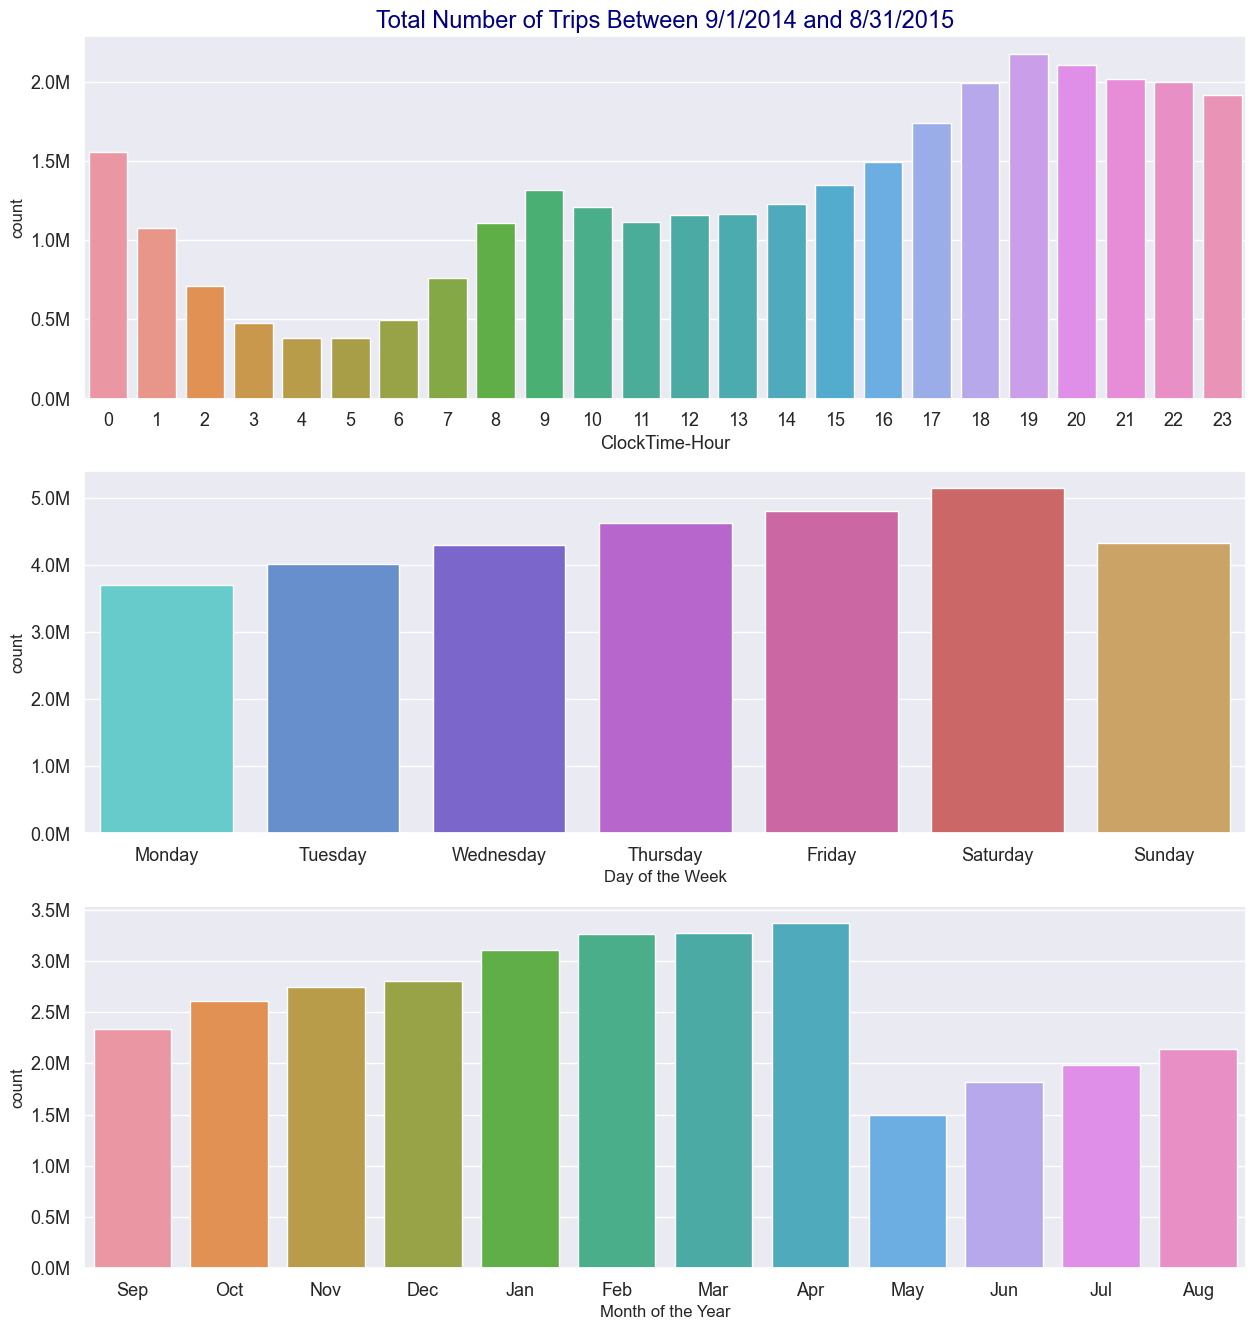

In [102]:
# Create plots comparing demand per different time categories:
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(millions_format)

plt.subplot(3,1,1) #this plot could have a polar format, although I'm not sure it'd be a better viz.
ax1 = sns.countplot(data = ds_viz, x = 'pu_hour', order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 9/1/2014 and 8/31/2015', fontsize=17, color='navy')
plt.xlabel('ClockTime-Hour', fontsize=13)

plt.subplot(3,1,2)
ax2 = sns.countplot(x = ds_viz.pu_weekday, order = range(7))
ax2.set_xticklabels(weekday_name)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('Day of the Week')

plt.subplot(3,1,3) #same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(x = ds_viz.pu_month)
ax3.set_xticklabels(month_name)
ax3.yaxis.set_major_formatter(formatter)
#plt.text(0, 3100000, 'Consistent growth in the number of trips from month to month!', color='navy', size=15)
plt.tick_params(labelsize=13)
plt.xlabel('Month of the Year')

#fig.subplots_adjust(hspace=.5)
plt.show()

**Insights**

* From the bar-charts above, we can conclude that the demand for Uber is **higher** from 4 PM till midnight whereas it achieves **peak** at 7pm .
* In second chart demand is gradually increases from monday to saturday and **Saturday has the highest demand**. Interestingly, Sunday shows a level of demand similar to Wednesday, which is higher than Monday or Tuesday.
* When looking at the total demand per month along the period of time analyzed, seasonal effects are masked by the consistent month-to-month growth.


### Estimated Monthly Base Revenue: how much was the NYC market worth in the period?

* For the first time, it’s possible to estimate Uber’s revenue in NYC with more granularity due to the availability of each trip’s duration and distance in the dataset. However, the revenue figures are described as “base revenue“, because other critical information is missing.

* Uber offers different types of services with distinct prices, namely Uber X, Uber XL, Uber Black, Uber SUV, and Uber Pool. Except for the latter, all other services carry a higher fare than Uber X. Moreover, Uber practices “price surging”, which affects the revenue positively.

* Here we chose to use Uber X published fares to calculate the revenue as this is probably the most popular product. Therefore, **the base revenue is a conservative estimate of the actual revenue.**


In [105]:
# creating dataset with grouped revenue sum by monthwise basis
byDateRevenue = ds_viz.groupby('pu_month')['revenue'].sum()

In [106]:
#Estimate Uber's gross margin for the entire 1 year period based on 25% share of the base revenue.

sumRev = byDateRevenue.sum()

In [107]:
sumRev

595058792.1882718

In [108]:
print("Base Revenue: ${:,.0f}M".format(sumRev * 1e-6), "\nUber's Base Gross Margin: ${:,.0f}".format(sumRev * .25))

Base Revenue: $595M 
Uber's Base Gross Margin: $148,764,698


In [111]:
byDateRevenue

pu_month
1    41457151.3925
2    47252851.6517
3    52154385.1658
4    54095066.2220
5    61539912.0576
6    63666674.3220
7    63606217.9800
8    65959345.6658
9    29967043.4250
10   35529631.5317
11   38169989.4300
12   41660523.3442
Name: revenue, dtype: float64

#### Create chart showing total base revenue per month

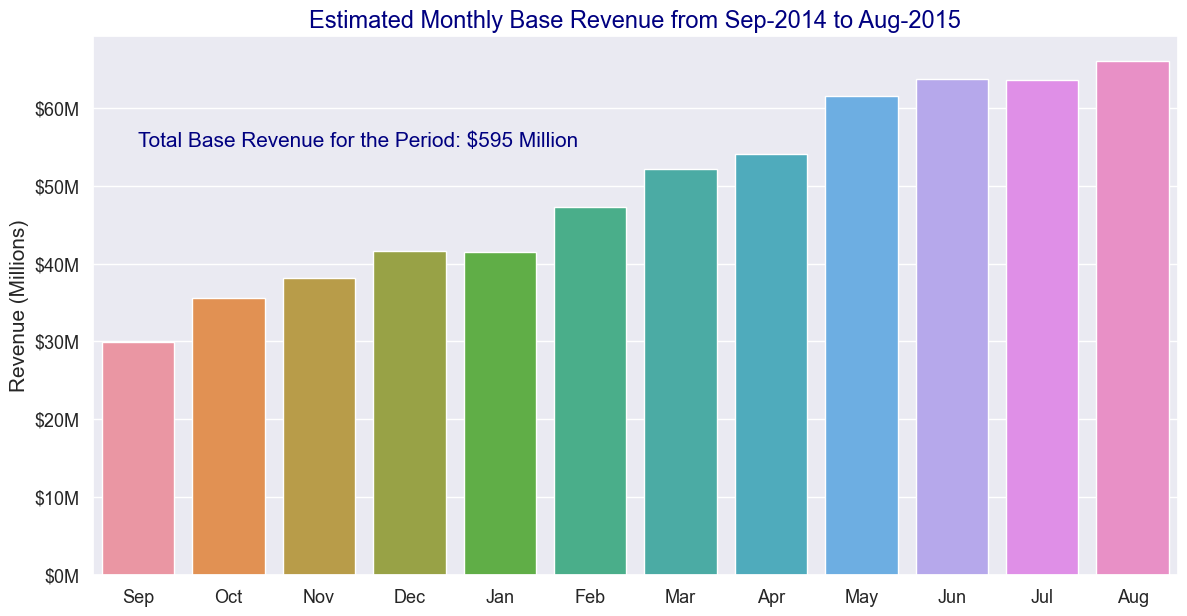

In [115]:
months_seq = [9,10,11,12,1,2,3,4,5,6,7,8]
formatter = FuncFormatter(millions_currency)

plt.figure(figsize = (14, 7))
ax = sns.barplot(x = byDateRevenue.index, y = byDateRevenue.values, order = months_seq)
ax.set_xticklabels(month_name)
ax.yaxis.set_major_formatter(formatter)

font = {'color': 'navy', 'size': 15} #text parameters
plt.text(0, 55000000, 'Total Base Revenue for the Period: ${:,.0f} Million'.format(sumRev * 1e-6),
         fontdict = font) #params: x, y, text, fontdict
plt.xlabel('')
plt.ylabel('Revenue (Millions)', fontsize = 15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize = 17, color='navy')

plt.show()

In [123]:
ds_viz.revenue.mean()

19.241628541986067

* It’s important to note that from the gross estimated revenue, Uber’s share is about 25% of the total. Therefore, we can conservatively estimate that Uber’s gross margin in NYC from September 2014 to August 2015 was in the order of **150 million  dollars**. The estimated gross margin, considering instead the 27 average fare previously mentioned, was of the order of **210 million dollars**.
* **Total revenue** of Uber in 1 Year is **595M and Gross margin of 149M**.
* In bar plot we observed that revenue per month generally increases month by month in that period except the month of january and june, this may happened because of 2 Federal holiday's in month of january and summer vacation started from july.  

In [125]:
# Month over Month Base Revenue Growth: how fast has Uber grown in the period?
#Create dictionary with calculated month over month revenue percentage growth:
dict_growth = {}

for i in range(len(months_seq)):
    mo = months_seq[i]
    rev = byDateRevenue[mo]
    if mo == 9:
        growth_pct = 0
    elif mo == 1:
        growth_pct = ((rev/byDateRevenue[12]) - 1) * 100
    else:
        growth_pct = ((rev/byDateRevenue[mo - 1]) - 1) * 100
    print(month_name[i], 'Revenue =', '${:,.0f}'.format(rev), 'Growth % = ', '{:.1f}%'.format(growth_pct))
    dict_growth[month_name[i]] = growth_pct
    
    

Sep Revenue = $29,967,043 Growth % =  0.0%
Oct Revenue = $35,529,632 Growth % =  18.6%
Nov Revenue = $38,169,989 Growth % =  7.4%
Dec Revenue = $41,660,523 Growth % =  9.1%
Jan Revenue = $41,457,151 Growth % =  -0.5%
Feb Revenue = $47,252,852 Growth % =  14.0%
Mar Revenue = $52,154,385 Growth % =  10.4%
Apr Revenue = $54,095,066 Growth % =  3.7%
May Revenue = $61,539,912 Growth % =  13.8%
Jun Revenue = $63,666,674 Growth % =  3.5%
Jul Revenue = $63,606,218 Growth % =  -0.1%
Aug Revenue = $65,959,346 Growth % =  3.7%


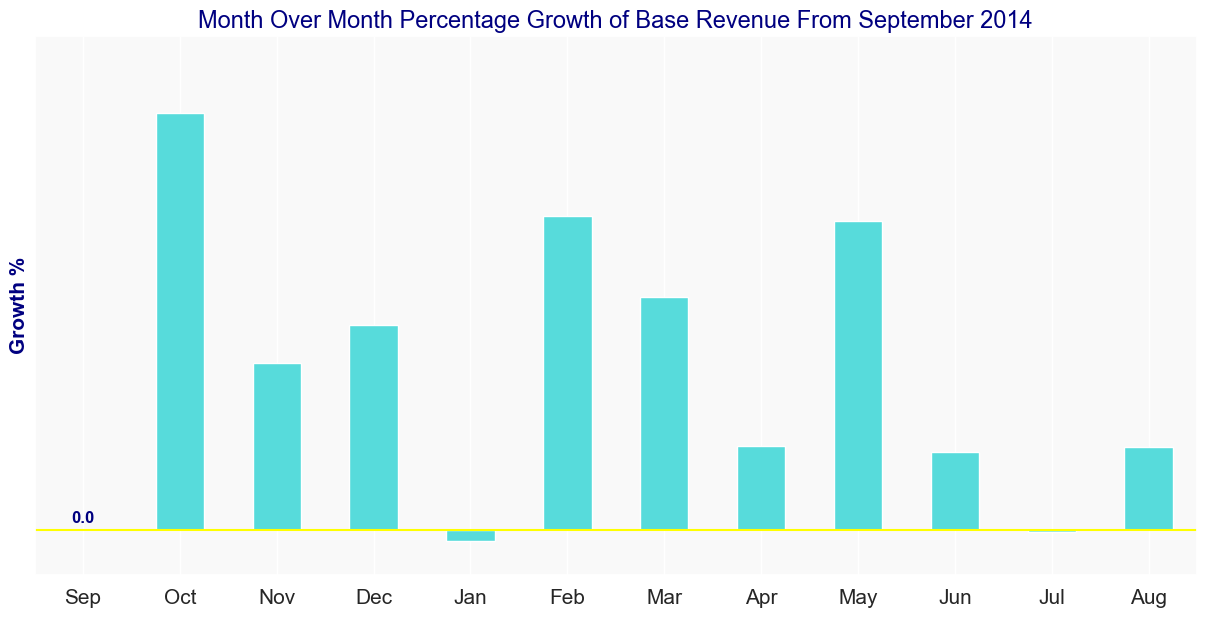

In [127]:
#Annotate Total Cummulative Growth for the Period

df_plt1 = pd.DataFrame(pd.Series(dict_growth), index = month_name, columns = ['growth_pct'])

labels_list = df_plt1.growth_pct.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt1.plot(kind = 'bar', figsize = (15,7), fontsize = 14, rot = 0, legend=False)#df_plt2[1:] to exclude Sep
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.axhline(0, color='yellow')
plt.title('Month Over Month Percentage Growth of Base Revenue From September 2014',
          fontsize = 17, color='navy')
plt.ylabel('Growth %', fontsize = 15, weight='bold', color='navy')
plt.ylim(-2, 22)
plt.tick_params(labelsize=15)

plt.show()

Cummulative % Growth Over Period: 83.54731533965318


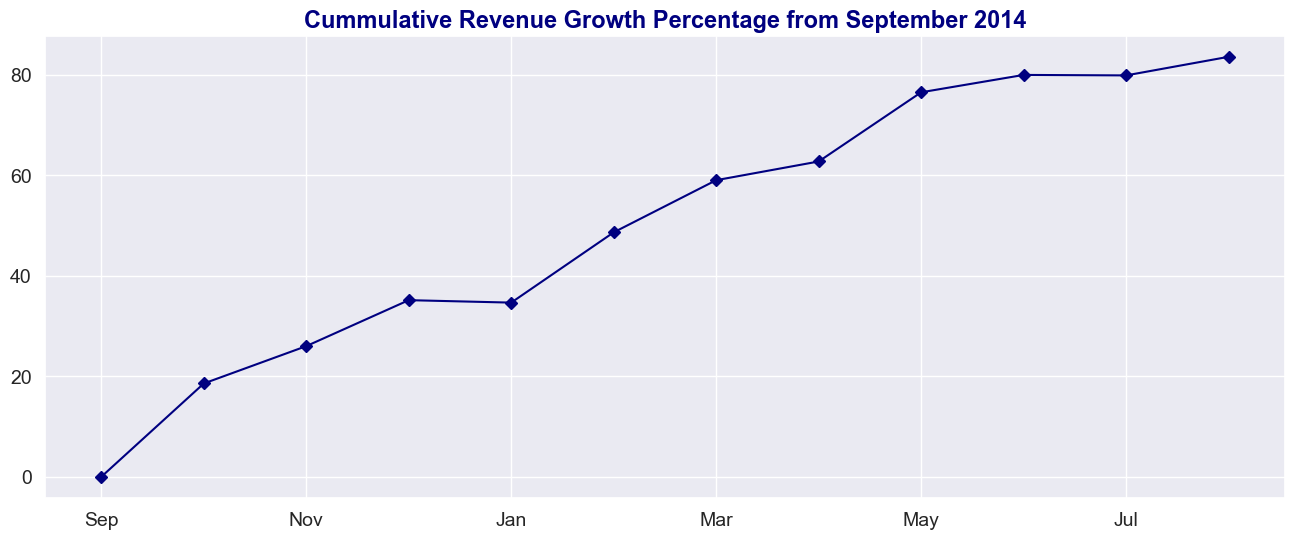

In [128]:
#Plot Cummulative Base Revenue Growth Over the Period
print('Cummulative % Growth Over Period:', df_plt1.growth_pct.sum())

df_plt1.cumsum().plot(color = 'navy', marker = 'D', legend = False, figsize=(16, 6))
plt.title('Cummulative Revenue Growth Percentage from September 2014', fontsize=17, weight='bold', color='navy')
plt.tick_params(labelsize=14)
plt.show()

* In above two cells of code we get to know that revenue per month generally increases month by month in that period except the month of january and june, this may be happened because of 2 Federal holiday's in month of january and summer vacation started from july.
* We get to know that revenue increased by **~84%** in a period of one year.

#### Which day of the week has the worst (slowest) traffic overall?

In [130]:
#Create dataframe with grouped data.
df_plt2 = ds_viz.groupby('pu_weekday')['mph_avg'].median() #used median since distribution is skewed.

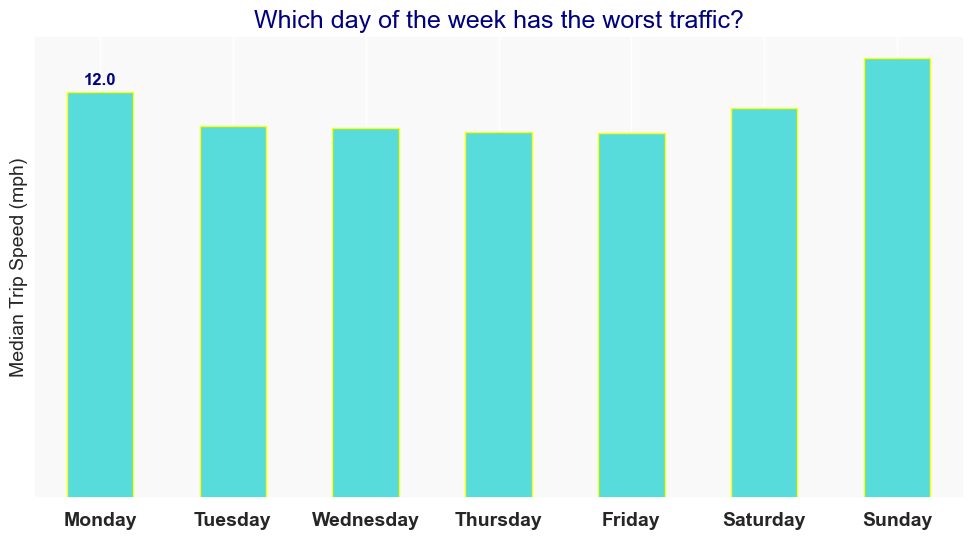

In [132]:
#Create plot. Does Saturday have better traffic flow than Monday?

fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.set_xticklabels(weekday_name, weight='bold')
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('Median Trip Speed (mph)', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
plt.show()
#plot_url = py.plot_mpl(fig)

* Monday seems to have slightly better flow than the other weekdays, and particularly better than Saturday. As expected, Sunday has the lightest traffic.

#### What is the median distance traveled per trip? Are there any insights we can learn from it?

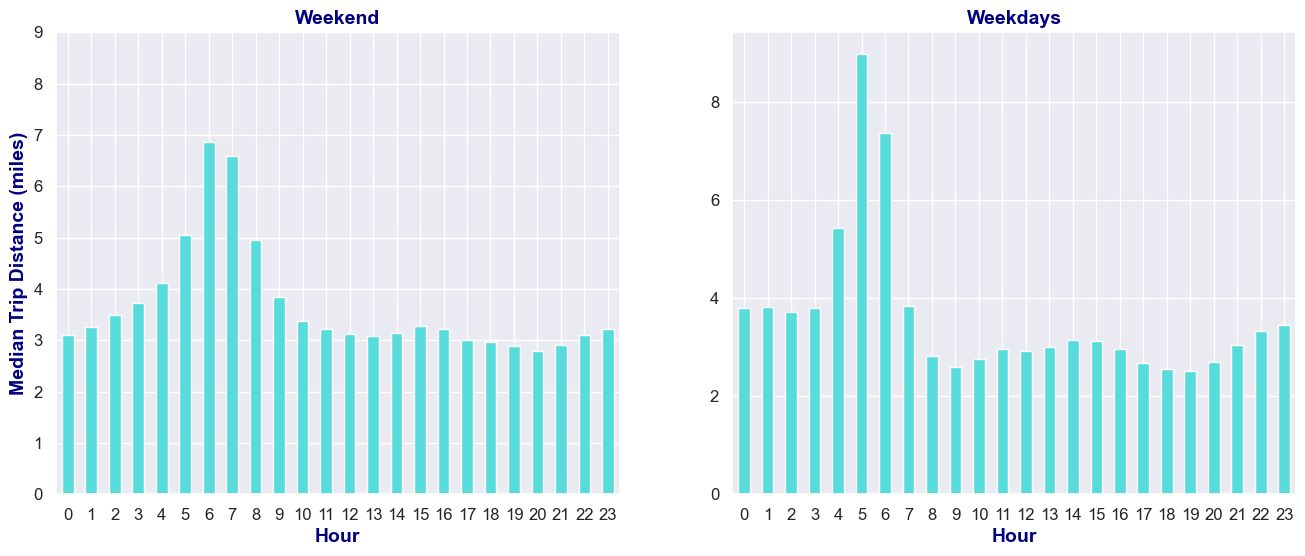

In [138]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
ds_viz[(ds_viz.pu_weekday >= 5)].groupby('pu_hour')['trip_distance'].median().plot(kind='bar', rot = 0, fontsize=14)
plt.ylim(0, 9)
plt.tick_params(labelsize=12)
plt.ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend', fontsize=14, weight='bold', color='navy')

plt.subplot(1,2,2)
ds_viz[ds_viz.pu_weekday < 5].groupby('pu_hour')['trip_distance'].median().plot(kind='bar', rot = 0)
plt.tick_params(labelsize=12)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()

* Why is the median distance traveled around 5 AM much longer than at the other times?Could it be picking up riders that would otherwise use public transportation to the outer boroughs?
* While the subway runs 24/7 in NYC, bus services don't. It's clear though that most customer are within Manhattan.

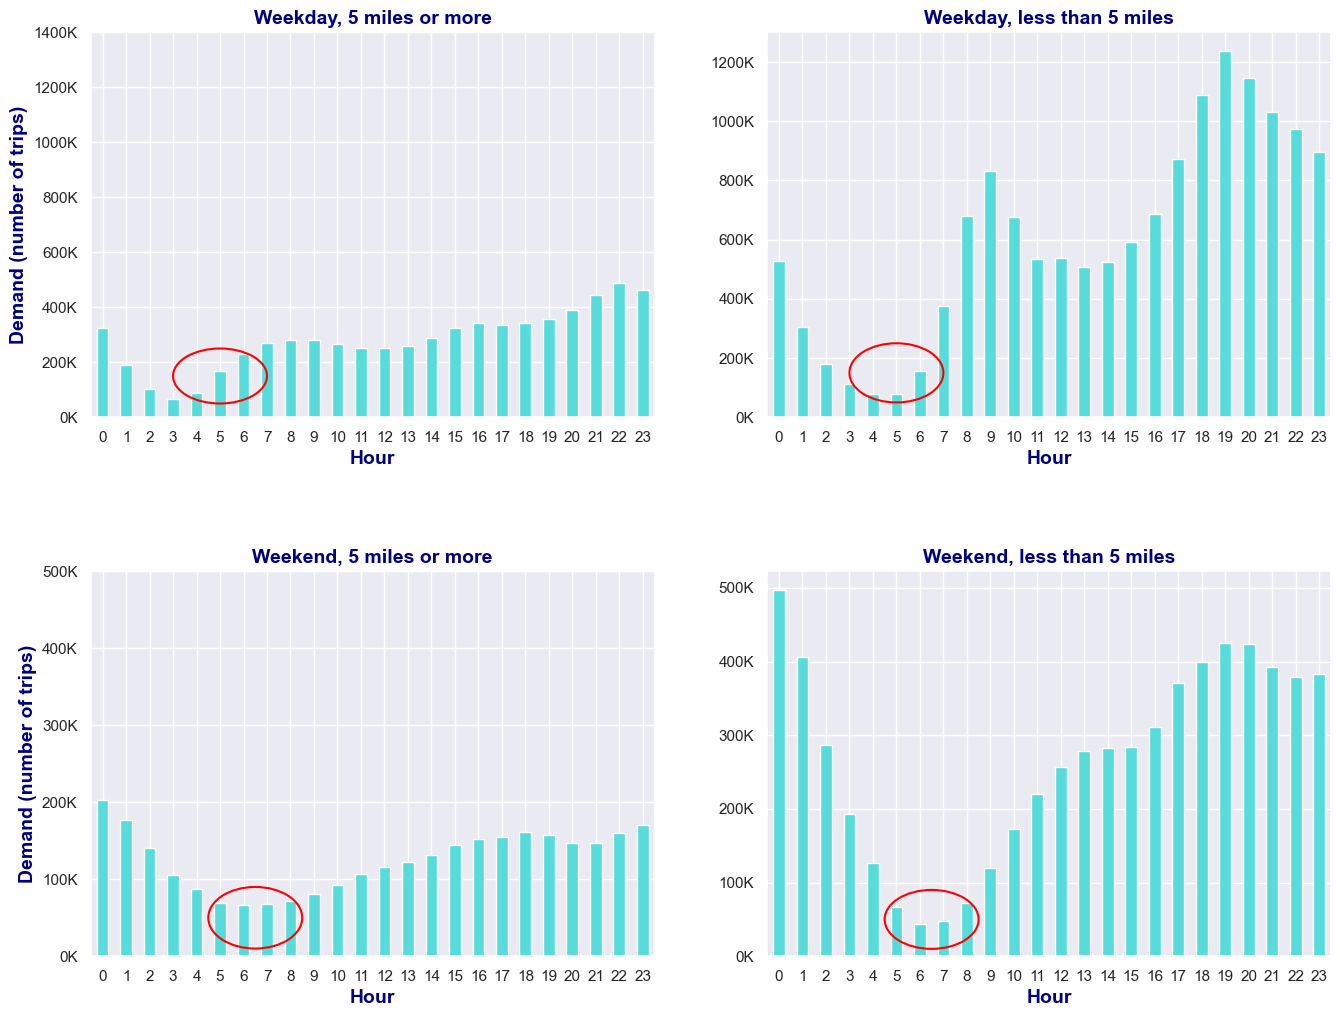

In [139]:
#Create plot similar to the above but with the count of trips per hour, comparing weekday vs weekend and
#distances >=5 versus < 5 miles. Indeed, the plots show that there is a higher demand for trips that go beyond
#miles (outside Manhattan) from 5 to 7 AM on weekdays, and from 6 to 8 AM on weekends (Saturday and Sunday).

fig = plt.figure(figsize = (16,12))
formatter = FuncFormatter(thousands_format)


plt.subplot(2,2,1)
ax1 = ds_viz[(ds_viz.pu_weekday < 5) & (ds_viz.trip_distance >= 5)].groupby('pu_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax1.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 1400000)
plt.title('Weekday, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,2)
ax2 = ds_viz[(ds_viz.pu_weekday < 5) & (ds_viz.trip_distance < 5)].groupby('pu_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax2.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5, 150000), width=4, height=200000, edgecolor='red', fc='None', lw=1.5)
ax2.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekday, less than 5 miles', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,3)
ax3 = ds_viz[(ds_viz.pu_weekday >= 5) & (ds_viz.trip_distance >= 5)].groupby('pu_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax3.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
ax3.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
plt.ylim(0, 500000)
plt.title('Weekend, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,4)
ax4 = ds_viz[(ds_viz.pu_weekday >= 5) & (ds_viz.trip_distance < 5)].groupby('pu_hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax4.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6.5, 50000), width=4, height=80000, edgecolor='red', fc='None', lw=1.5)
ax4.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend, less than 5 miles', fontsize=14, weight='bold', color='navy')


fig.subplots_adjust(hspace=0.4)
plt.show()
#plot_url = py.plot_mpl(fig)

* The red circles highlight the focus areas where the number of long trips is greater than the number of short trips, and this occurs both on weekdays and weekends, although at slightly different times: the demand is **higher for longer trips from about 5 to 7 AM on weekdays, and from 6 to 8 AM on weekends**

#### What are the most popular pickup and drop-off taxi zones?

C:\Users\Viz\AppData\Local\Temp\ipykernel_12824\3040551955.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
C:\Users\Viz\AppData\Local\Temp\ipykernel_12824\3040551955.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])


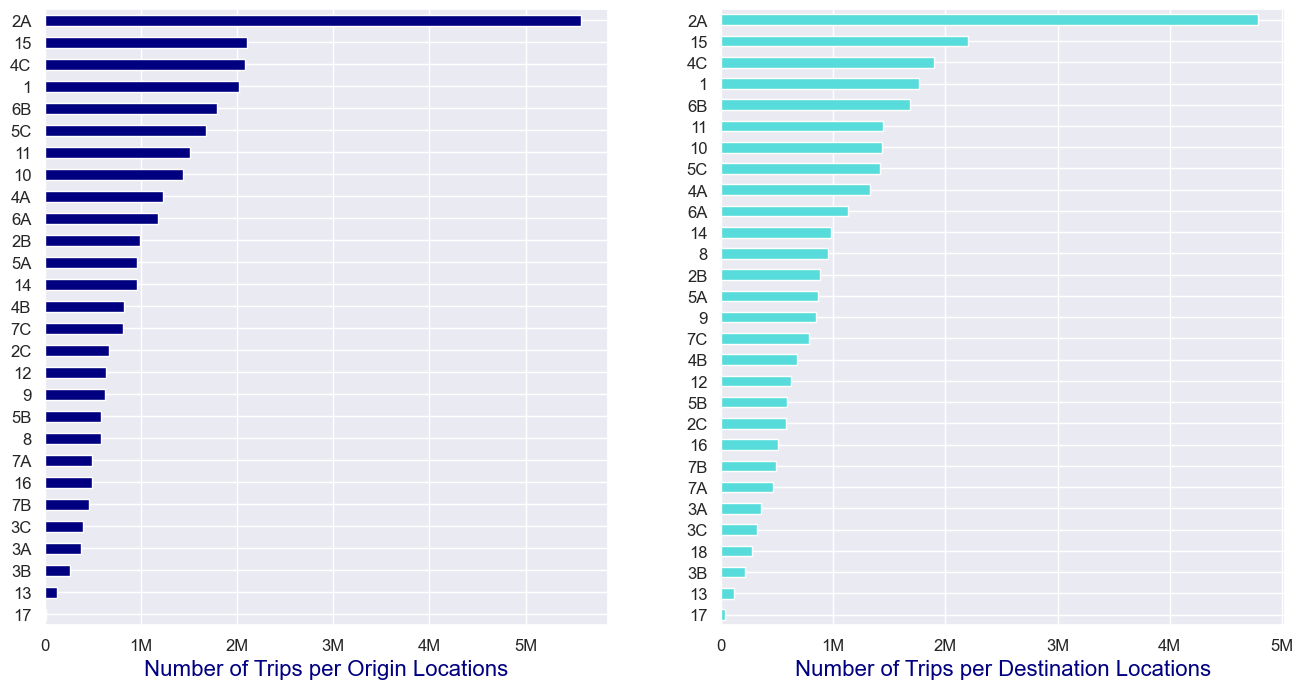

In [141]:
#CREATE INSTEAD SIDE-STACKED PLOT WITH TOP 10 PICKUP AND DROP-OFF LOCATIONS? OR TRY TOYPLOT WITH VALUE FOR EACH BAR.
fig = plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
ax1 = ds_viz.origin_taz.value_counts(ascending = True).plot(kind = 'barh', color = 'navy')
ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Origin Locations', fontsize = 16, color='navy')

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
ax2 = ds_viz.destination_taz.value_counts(ascending = True).plot(kind = 'barh')
ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Destination Locations', fontsize = 16, color='navy')

plt.show()
#plot_url = py.plot_mpl(fig)

* The top 5 locations for origin and destination are the same: 2A, 15, 4C, 1, and 6B (likely all in Manhattan).
* The top location for pick up and drop off, 2A, accounts for more than the total trips for the next two popular locations.
*  Top origin codes are **probably based in Manhattan**. In this case, the top **destination codes are also based in Manhattan**.

In [143]:
#Percentage of trips represented by the top five origins/destinations:
print(ds_viz.origin_taz.value_counts().head(5).sum()/float(len(ds_viz))) #13,583,249
print(ds_viz.destination_taz.value_counts().head(5).sum()/float(len(ds_viz[ds_viz.destination_taz.isnull() == False])))

0.439221700963933
0.4158518051630237


In [145]:
#Total pickups or drop-offs within any combination of the top 5 locations: 6231353 (20% of the total trips)
len(ds_viz[(ds_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & \
           (ds_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231746

In [146]:
#29% of all trips start or finish at 2A:
len(ds_viz[(ds_viz.origin_taz == '2A') | (ds_viz.destination_taz == '2A')])/(1.0*len(ds_viz)) #8979830

0.2903843657780672

* The most **popular pickup and drop-off locations are 2A**. In fact, **29%** of all Uber trips during the analyzed period have either started or ended in this zone.

#### Visualizing the most popular pickup and drop off location pairs

In [148]:
#Define data to plot:
df_plt3 = ds_viz.pivot_table('id', aggfunc='count', index='origin_taz', columns='destination_taz')

In [149]:
df_plt3.shape

(28, 29)

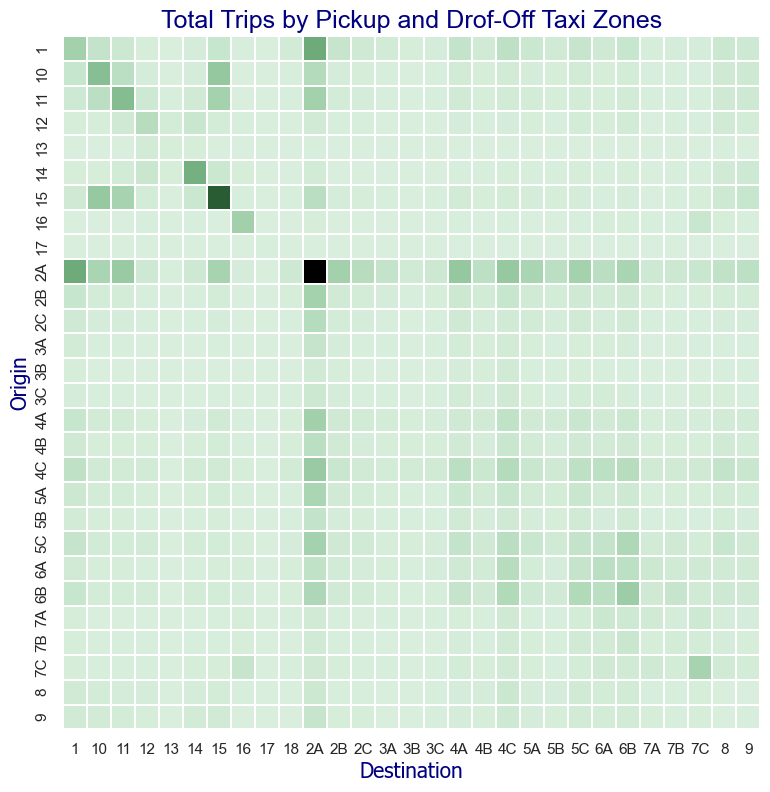

In [150]:
#Visualize the origin versus destination matrix via a heatmap:

fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()

In [151]:
len(ds_viz[(ds_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & \
           (ds_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231746

## What is the mean time and distance to destination from the most popular pick up location?

In [152]:
#Plot the mean travel time from the most popular origin, to all possible destinations.
df_plt4 = ds_viz[ds_viz.origin_taz == '2A'].groupby('destination_taz')['trip_distance'].mean().sort_values()
df_plt5 = ds_viz[ds_viz.origin_taz == '2A'].groupby('destination_taz')['duration_minutes'].mean().sort_values()

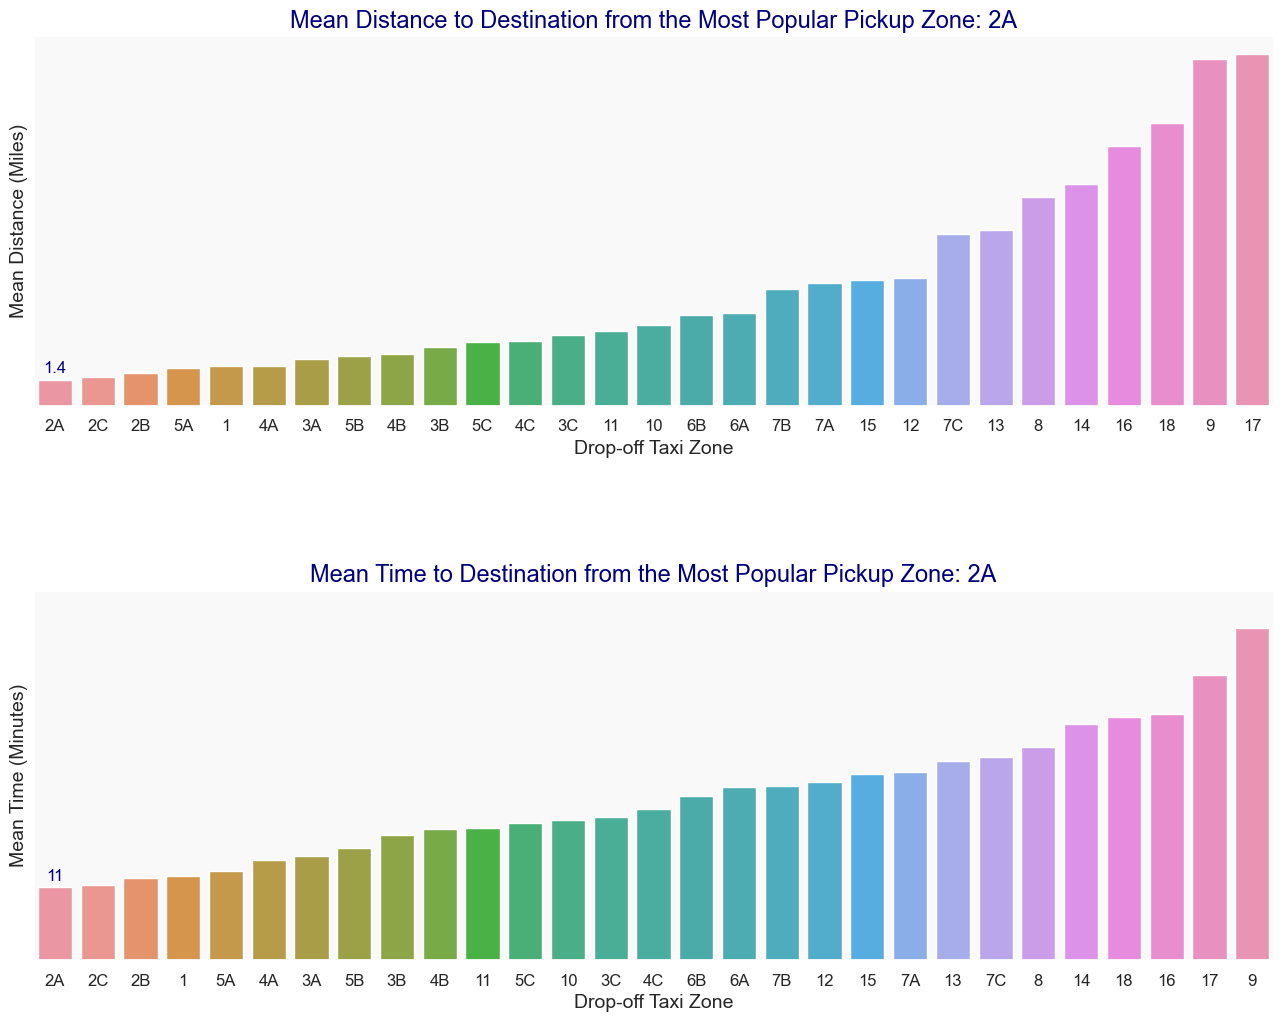

In [153]:
#Assuming 18 is EWR, and given the average driving distance from 2A, this pick up location is probably located in
#Midtown, not in Lower Manhattan (Penn Station lat/long: 40.750568, -73.993519)
#Straight line distance: 11 miles, Driving distance: 15 miles Difference: 36%
#The mean time and distance to zone 18 adds further evidence that it's the EWR airport (from Midtown).
#Based on the distance from 2A, if the origin is Midtown, then 15 is in Upper Manhattan.

fig = plt.figure(figsize = (16,12))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'color': 'navy'}


plt.subplot(2,1,1)
ax1 = sns.barplot(x=df_plt4.index, y=df_plt4.values)
ax1.set_facecolor('#F9F9F9')
#ax1.set_yticks(range(0, 21, 2))
ax1.get_yaxis().set_ticks([])
labels_list = df_plt4.values.round(1)
annotate_labels(ax1, labels_list, **kwargs)
plt.title('Mean Distance to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Distance (Miles)', fontsize = 14)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


plt.subplot(2,1,2)
ax2 = sns.barplot(x=df_plt5.index, y=df_plt5.values)
ax2.set_facecolor('#F9F9F9')
#ax2.set_yticks(range(0, 51, 5))
ax2.get_yaxis().set_ticks([])
labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
annotate_labels(ax2, labels_list, **kwargs)
plt.title('Mean Time to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Time (Minutes)', fontsize = 14)
plt.ylim(0,55)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)


fig.subplots_adjust(hspace=.5)
plt.show()
#plot_url = py.plot_mpl(fig)

* The charts above show the mean distance and time to destination for a trip originating at 2A.
* The data has 28 unique origin codes and 29 unique destination codes. Assuming that code 18, the extra destination code, represents the Newark Airport (EWR), a relevant destination outside of New York City, then we can infer that 2A is in Midtown, based on the mean time and distance to arrive at location 18.

* Given the concentrated demand within Manhattan, about 68% of all Uber trips have a driven distance of 5 miles or less.

#### Visualization of Variable Distributions and Bivariate Relationships.

In [155]:
ds_viz.trip_distance.max(), ds_uber.trip_distance.max()

(568.57, 2593.08)

In [156]:
freq, bins_dist = np.histogram(ds_viz.trip_distance, bins=10, range=(0, 25))
freq, bins_dist

(array([12709826,  8364566,  3567011,  2035398,  1296933,   672722,
          706028,   747772,   299950,   132574], dtype=int64),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]))

In [157]:
#69% of all trips had distance < 5 miles
for val in freq:
    print(float(val)/sum(freq))

0.41626822058129
0.2739536327841749
0.11682562151235491
0.06666271462998129
0.04247674139072826
0.022032779196653564
0.02312360682518919
0.024490793173762754
0.009823867987127278
0.004342021918737829


In [159]:
ds_viz.trip_distance.median(), ds_viz.trip_distance.mean()

(3.09, 5.19966051883583)

In [161]:
print(len(ds_viz[ds_viz.trip_distance <= 5])/(1.0 *len(ds_viz))) #68% of trips are 5 miles or less
print(len(ds_viz[ds_viz.trip_distance <= 2])/(1.0 *len(ds_viz))) #32% of trips are 2 miles or less

0.6821349979567086
0.3192326718122213


In [162]:
#Vey long distance trips (>= 300 miles):
ds_viz[ds_viz.trip_distance >= 300].head(10) #45 total

,id,origin_taz,destination_taz,trip_distance,pu_date,pu_year,pu_month,pu_day,pu_hour,pu_weekday,duration_minutes,mph_avg,revenue
943214,19594602,10,15,371.5500,2014-09-16,2014,9,16,10,1,474.2833,47.0035,818.7617
3620586,5138875,14,NaN,357.2700,2014-11-04,2014,11,4,23,1,309.5167,69.2570,736.1033
10581718,10072444,16,NaN,330.9000,2015-02-04,2015,2,4,18,2,648.5000,30.6153,808.6000
11224977,17353914,15,15,378.0100,2015-02-25,2015,2,25,15,2,600.7667,37.7528,874.3358
11684172,23119455,14,14,350.1500,2015-02-03,2015,2,3,18,1,559.3500,37.5597,811.0850
13829799,16426984,15,NaN,568.5700,2015-03-27,2015,3,27,19,4,652.3167,52.2970,1225.8583
16530542,15478567,7A,17,315.5700,2015-04-09,2015,4,9,1,3,248.0667,76.3271,641.6208
18643154,6860856,5C,16,308.4200,2015-05-31,2015,5,31,5,6,304.1833,60.8357,648.7492
18854980,9245564,15,15,302.7900,2015-05-10,2015,5,10,22,6,441.6667,41.1337,687.0158
18949729,10208984,4A,7C,335.3000,2015-05-09,2015,5,9,16,5,813.6667,24.7251,874.1083


### Distribution of trip duration (in minutes)

In [163]:
#Median trip duration is ~ 17 minutes
ds_viz.duration_minutes.describe()

count   30925594.0000
mean          20.9915
std           16.0668
min            0.0000
25%           10.8500
50%           17.2333
75%           26.6833
max          899.0667
Name: duration_minutes, dtype: float64

In [164]:
freq, bins_dur = np.histogram(ds_viz.duration_minutes, bins=10, range=(0, 50))
freq, bins_dur

(array([1235201, 5391527, 6312324, 5266965, 3929223, 2777187, 1878407,
        1256167,  852543,  589921], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

### Distribution of trip duration (in minutes)

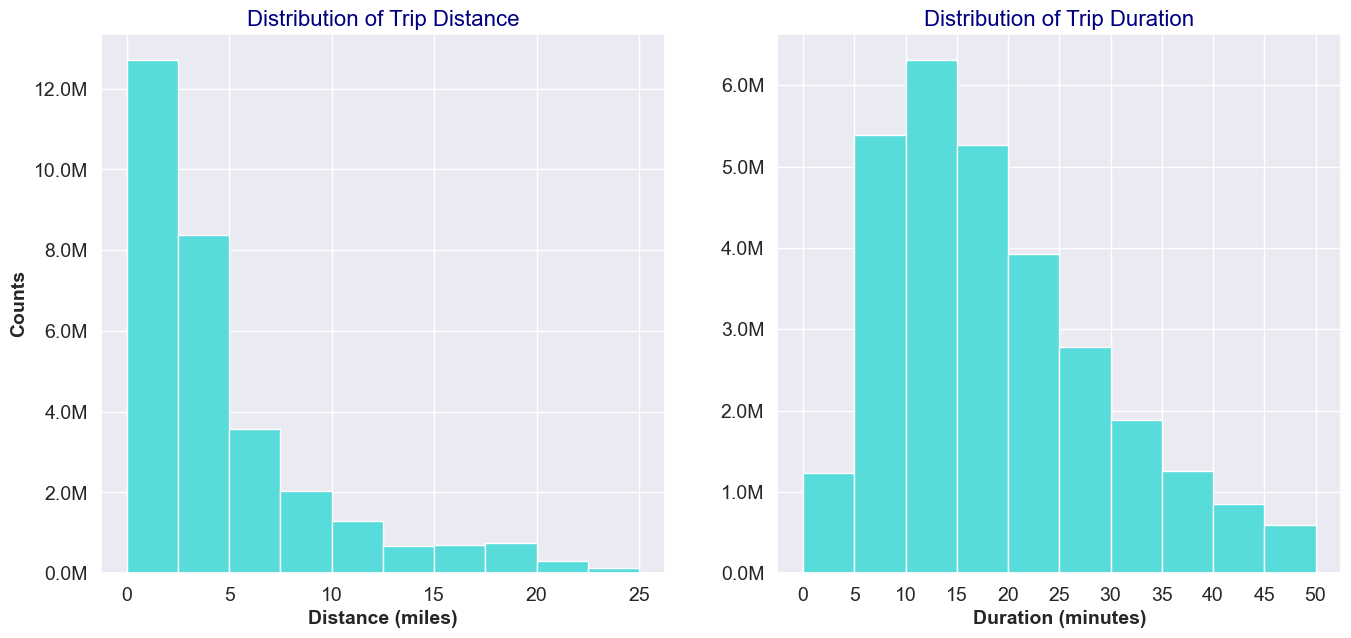

In [165]:
#Here we plot the distribution of trip duration next to the histogram of trip distance for comparison.
fig = plt.figure(figsize=(16, 7))

formatter = FuncFormatter(millions_format)

plt.subplot(1,2,1)
ax1 = ds_viz.trip_distance.dropna().hist(bins=bins_dist)
ax1.yaxis.set_major_formatter(formatter)

plt.xlabel('Distance (miles)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Distance', color='navy', fontsize=16)


plt.subplot(1,2,2)
ax2 = ds_viz.duration_minutes.hist(bins=bins_dur)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_xticks(bins_dur) #bins are in 5 minutes intervals.

plt.xlabel('Duration (minutes)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Duration', color='navy', fontsize=16)

plt.show()

* The histograms above illustrate the distribution of the distance and duration of Uber trips.

#### Trip Distance versus Trip Duration

In [167]:
#Create data to plot with average distance and duration grouped by origin-destination location pairs:
df_plt6 = ds_viz.groupby(['origin_taz', 'destination_taz'])['trip_distance', 'duration_minutes'].mean()
df_plt6.values

C:\Users\Viz\AppData\Local\Temp\ipykernel_12824\2045406963.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plt6 = ds_viz.groupby(['origin_taz', 'destination_taz'])['trip_distance', 'duration_minutes'].mean()


array([[ 1.41802608, 10.55698407],
       [ 3.65079126, 17.97757849],
       [ 5.0936793 , 22.48992547],
       ...,
       [19.84841839, 44.50434658],
       [12.19842835, 29.74001046],
       [ 2.52056516,  9.87329898]])

In [168]:
df_plt6.shape #distance, duration (x, y): Fit function to replace 7 incorrect duration entries with estimate.

(812, 2)

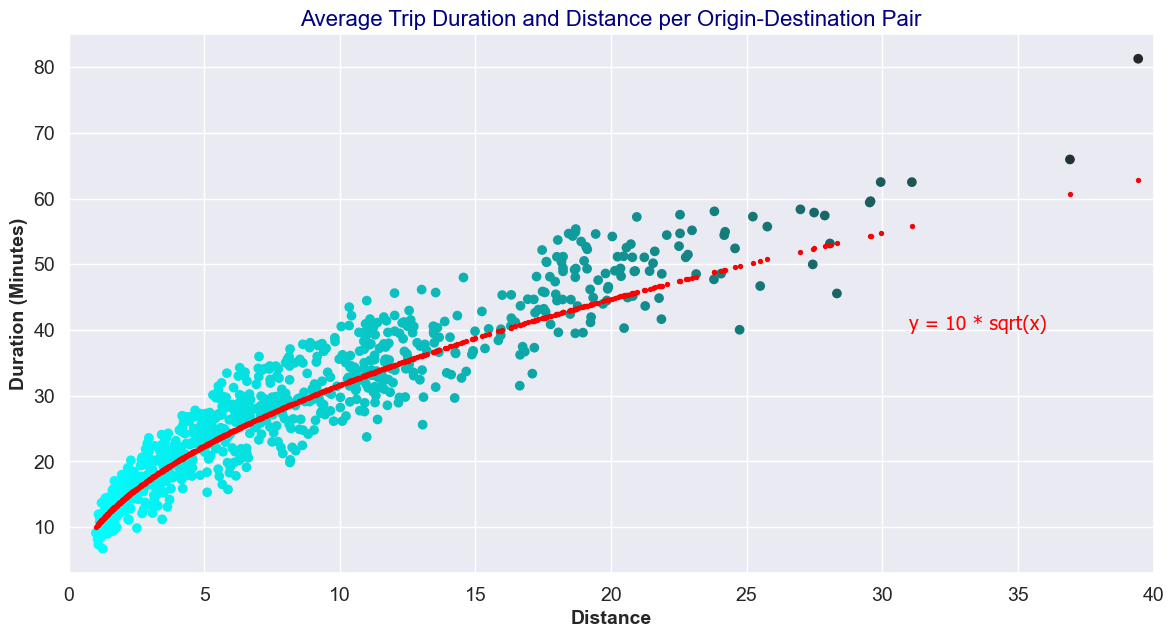

In [169]:

#Create plot.
distance = df_plt6.values[:,:1]
duration = df_plt6.values[:,1:]
duration_hat = pd.Series(distance.reshape(812,)).apply(lambda x: 10*np.sqrt(x))

plt.figure(figsize = (14,7))
cmap = sns.dark_palette('cyan', 3, reverse = True, as_cmap=True)

plt.scatter(distance, duration, c=distance, cmap= cmap) # it looks like a 10*sqrt(x) power distribution
plt.scatter(distance, duration_hat, color='red', s=8)

font = {'color': 'red', 'size': 14, 'family': 'Tahoma'}
plt.text(31, 40, 'y = 10 * sqrt(x)', fontdict = font)
plt.xlim(0, 40)
plt.xlabel('Distance', fontsize = 14, weight='bold')
plt.ylabel('Duration (Minutes)', fontsize = 14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Average Trip Duration and Distance per Origin-Destination Pair', fontsize = 16, color='navy')


plt.show()
#The relation between a trip’s duration and distance is not entirely linear. Rather, it approximates to a power function because the shorter trips, occurring mostly within busy areas of traffic, tend to result in lower average trip speed.

The relation between a trip’s duration and distance is not entirely linear. Rather, it approximates to a power function because the shorter trips, occurring mostly within busy areas of traffic, tend to result in lower average trip speed.

In [170]:
df_plt6[df_plt6.trip_distance > 25] #origin and destination pairs whose distance between them is greater than 25 miles

trip_distance  duration_minutes
origin_taz destination_taz                                 
13         18                     28.0717           53.1685
14         17                     27.8808           57.4252
           18                     29.9431           62.5171
16         17                     31.0922           62.5046
           18                     28.3292           45.5679
17         14                     27.4876           57.8793
           16                     39.4353           81.2769
           7C                     25.2298           57.2576
           9                      25.5005           46.6947
7A         17                     29.5695           59.6055
7C         17                     26.9832           58.3610
8          17                     25.7619           55.7408
           18                     29.5376           59.4060
9          17                     27.4381           49.9894
           18                     36.9205           65.9577

#### Distribution of the average speed per trip

In [171]:
#Note: this uses processed data (24904 (0.08%) entries with null or zero in duration resulted in null value for speed)
ds_viz.mph_avg.describe()

count   30900728.0000
mean          13.5074
std           11.7568
min            0.0000
25%            8.4100
50%           11.4489
75%           16.2669
max        22548.0000
Name: mph_avg, dtype: float64

In [172]:
freq, bins = np.histogram(ds_viz.mph_avg, bins=10, range=(0, 50))
freq, bins

(array([ 1313432, 10564985,  9862415,  4248624,  2152852,  1282011,
          767843,   434359,   196184,    61865], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

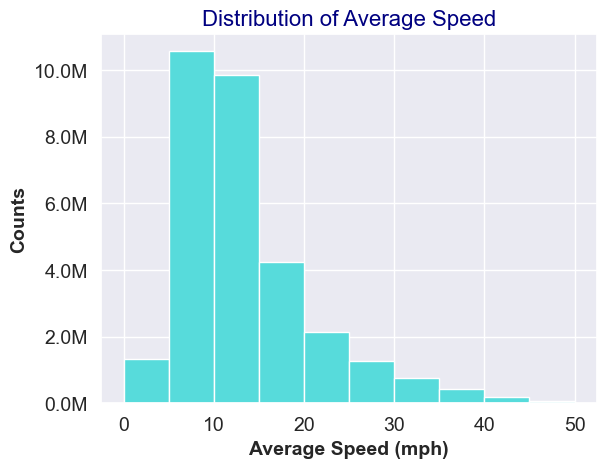

In [175]:
fig, ax = plt.subplots(1,1)

formatter = FuncFormatter(millions_format)

ax.hist(ds_viz.mph_avg.dropna(), bins)
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('Average Speed (mph)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()

In [176]:
#Median trip average speed during weekdays:
df_plt7 = ds_viz[ds_viz.pu_weekday < 5].groupby('pu_hour')['mph_avg'].median()
df_plt7.head()

pu_hour
0   14.3014
1   15.3748
2   16.1274
3   16.6125
4   19.5019
Name: mph_avg, dtype: float64

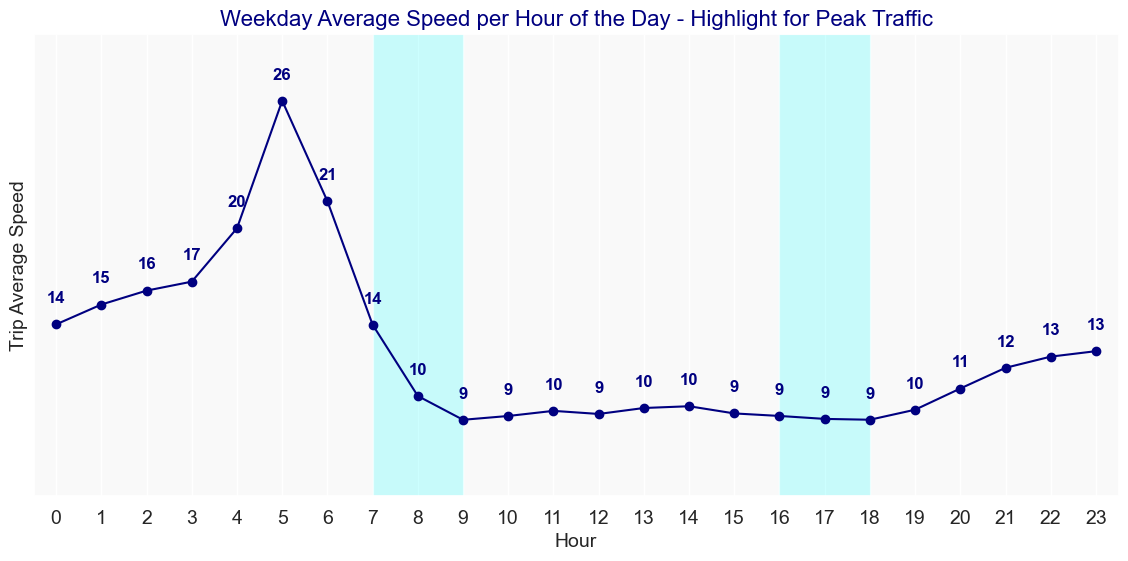

In [177]:
#Plot Peak Hour Median Trip Average Speed During Weekdays:

plt.figure(figsize =(14, 6))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}

#weekdays only: rush hour traffic 7-9 + 16-18
ax = df_plt7.plot(marker = 'o', color = 'navy')

for x, y in zip(df_plt7.index, df_plt7.values):
    ax.annotate('{:.0f}'.format(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)

ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([]) #hide tick labels on y-axis
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

In [178]:
def is_peak_hour(x):
    """
    Function that takes an array(x) with two integers representing
    hour of the day and weekday, respectively, and
    returns 1 if it's peak hour as defined, 0 otherwise.
    """
    return 1 if x[0] in (7,8,9,16,17,18) and x[1] < 5 else 0 #total peak hour periods = 6h

In [182]:
ds_viz['peak_hour'] = pd.Series(map(lambda x: is_peak_hour(x), ds_viz.loc[:, ['pu_hour', 'pu_weekday']].values))

C:\Users\Viz\AppData\Local\Temp\ipykernel_12824\1740486801.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)


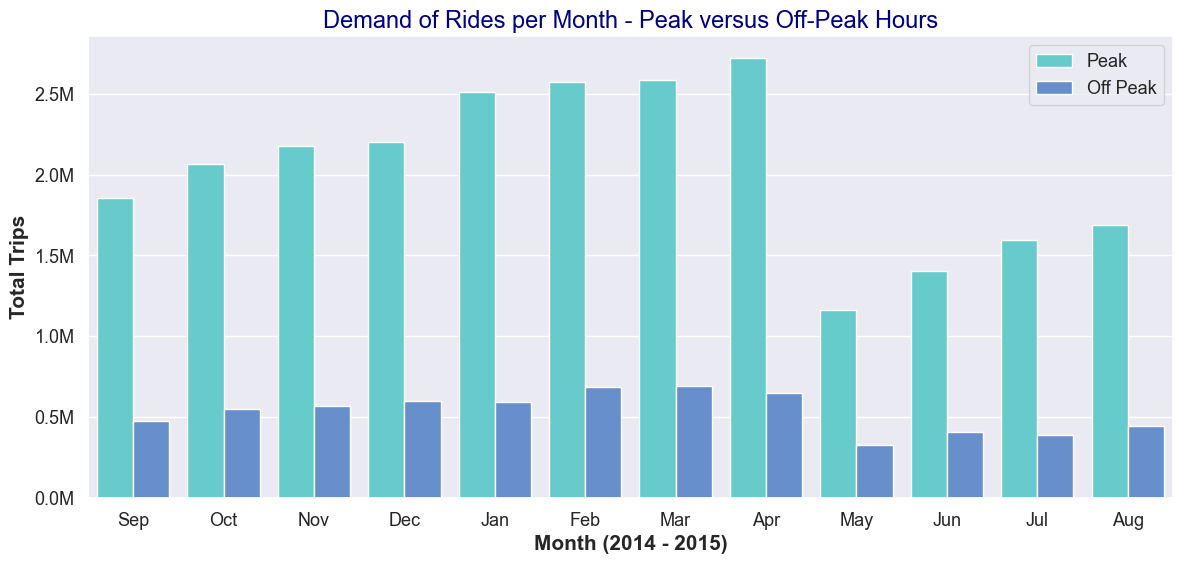

In [183]:
#Plot the total number of trips per month during peak hours and off-peak hours.
#Count for peak hours must represent more than 25% (6h) of the total rides to be more significant than non-peak hours.
plt.figure(figsize = (14, 6))
formatter = FuncFormatter(millions_format)

#to add labels and operate on data, use pivot instead of countplot directly with hue.
ax = sns.countplot(x = ds_viz['pu_month'], hue = ds_viz['peak_hour'])
ax.set_xticklabels(month_name)
ax.yaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels() #will cause the warning msg that can be ignored
plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
plt.tick_params(labelsize=13)
plt.xlabel('Month (2014 - 2015)', fontsize = 15, weight='bold')
plt.ylabel('Total Trips', fontsize = 15, weight='bold')
plt.title('Demand of Rides per Month - Peak versus Off-Peak Hours', fontsize = 17, color='navy')
plt.show()

# End of Code